# Ames Housing: Mutliple Linear Regression

In this project, I am building a model to predict house prices based off data from [here](https://www.kaggle.com/c/dsi-us-12-project-2-regression-challenge/overview). This is for a Kaggle Linear Regression Challenge with fellow General Assembly DSI fellows.  The description of the data can be found in the ReadMe file associated with this Juptyer Notebook.  

- [01-Prep the data](#section1)
- [02-Creating a Linear Regression Model](#section2)
- [03-Evaluate the Linear Regression Model](#section3)
- [04-Engineer Features](#section4)
    - [4a. Make features.](#section4a)
    - [4b. Find correlations.](#section4b)
    - [4c. Rebuild a model with new features.](#section4c)
    - [4d. Evaluating the new model.](#section4d)
- [05-Submission to upload](#section5)

## 01-Prep the data. <a class="anchor" id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('./datasets/train_clean.csv')
pd.set_option('display.max_columns',100)
df.head(3)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976-01-01 00:00:00,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997-01-01 00:00:00,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953-01-01 00:00:00,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [3]:
df.shape

(2050, 82)

## 02-Creating a Linear Regression Model. <a class="anchor" id="section2"></a>

In [4]:
df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=True).head(10)

,SalePrice
PID,-0.254933
Enclosed Porch,-0.135397
Kitchen AbvGr,-0.125488
Overall Cond,-0.096952
MS SubClass,-0.087283
Id,-0.051240
Bsmt Half Bath,-0.045340
Low Qual Fin SF,-0.041616
Yr Sold,-0.015316
Misc Val,-0.007392


In [5]:
top_corr = df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False).head(10)
top_corr

,SalePrice
SalePrice,1.000000
Overall Qual,0.800208
Gr Liv Area,0.697261
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.629273
1st Flr SF,0.618451
Full Bath,0.538211
TotRms AbvGrd,0.503990
Fireplaces,0.471034


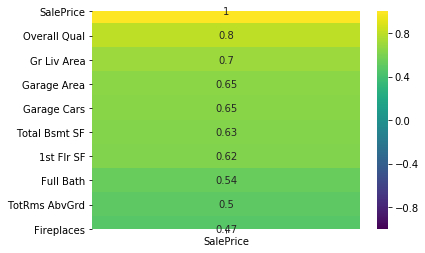

In [6]:
sns.heatmap(top_corr,
           vmin=-1,
           cmap='viridis',
           annot=True);

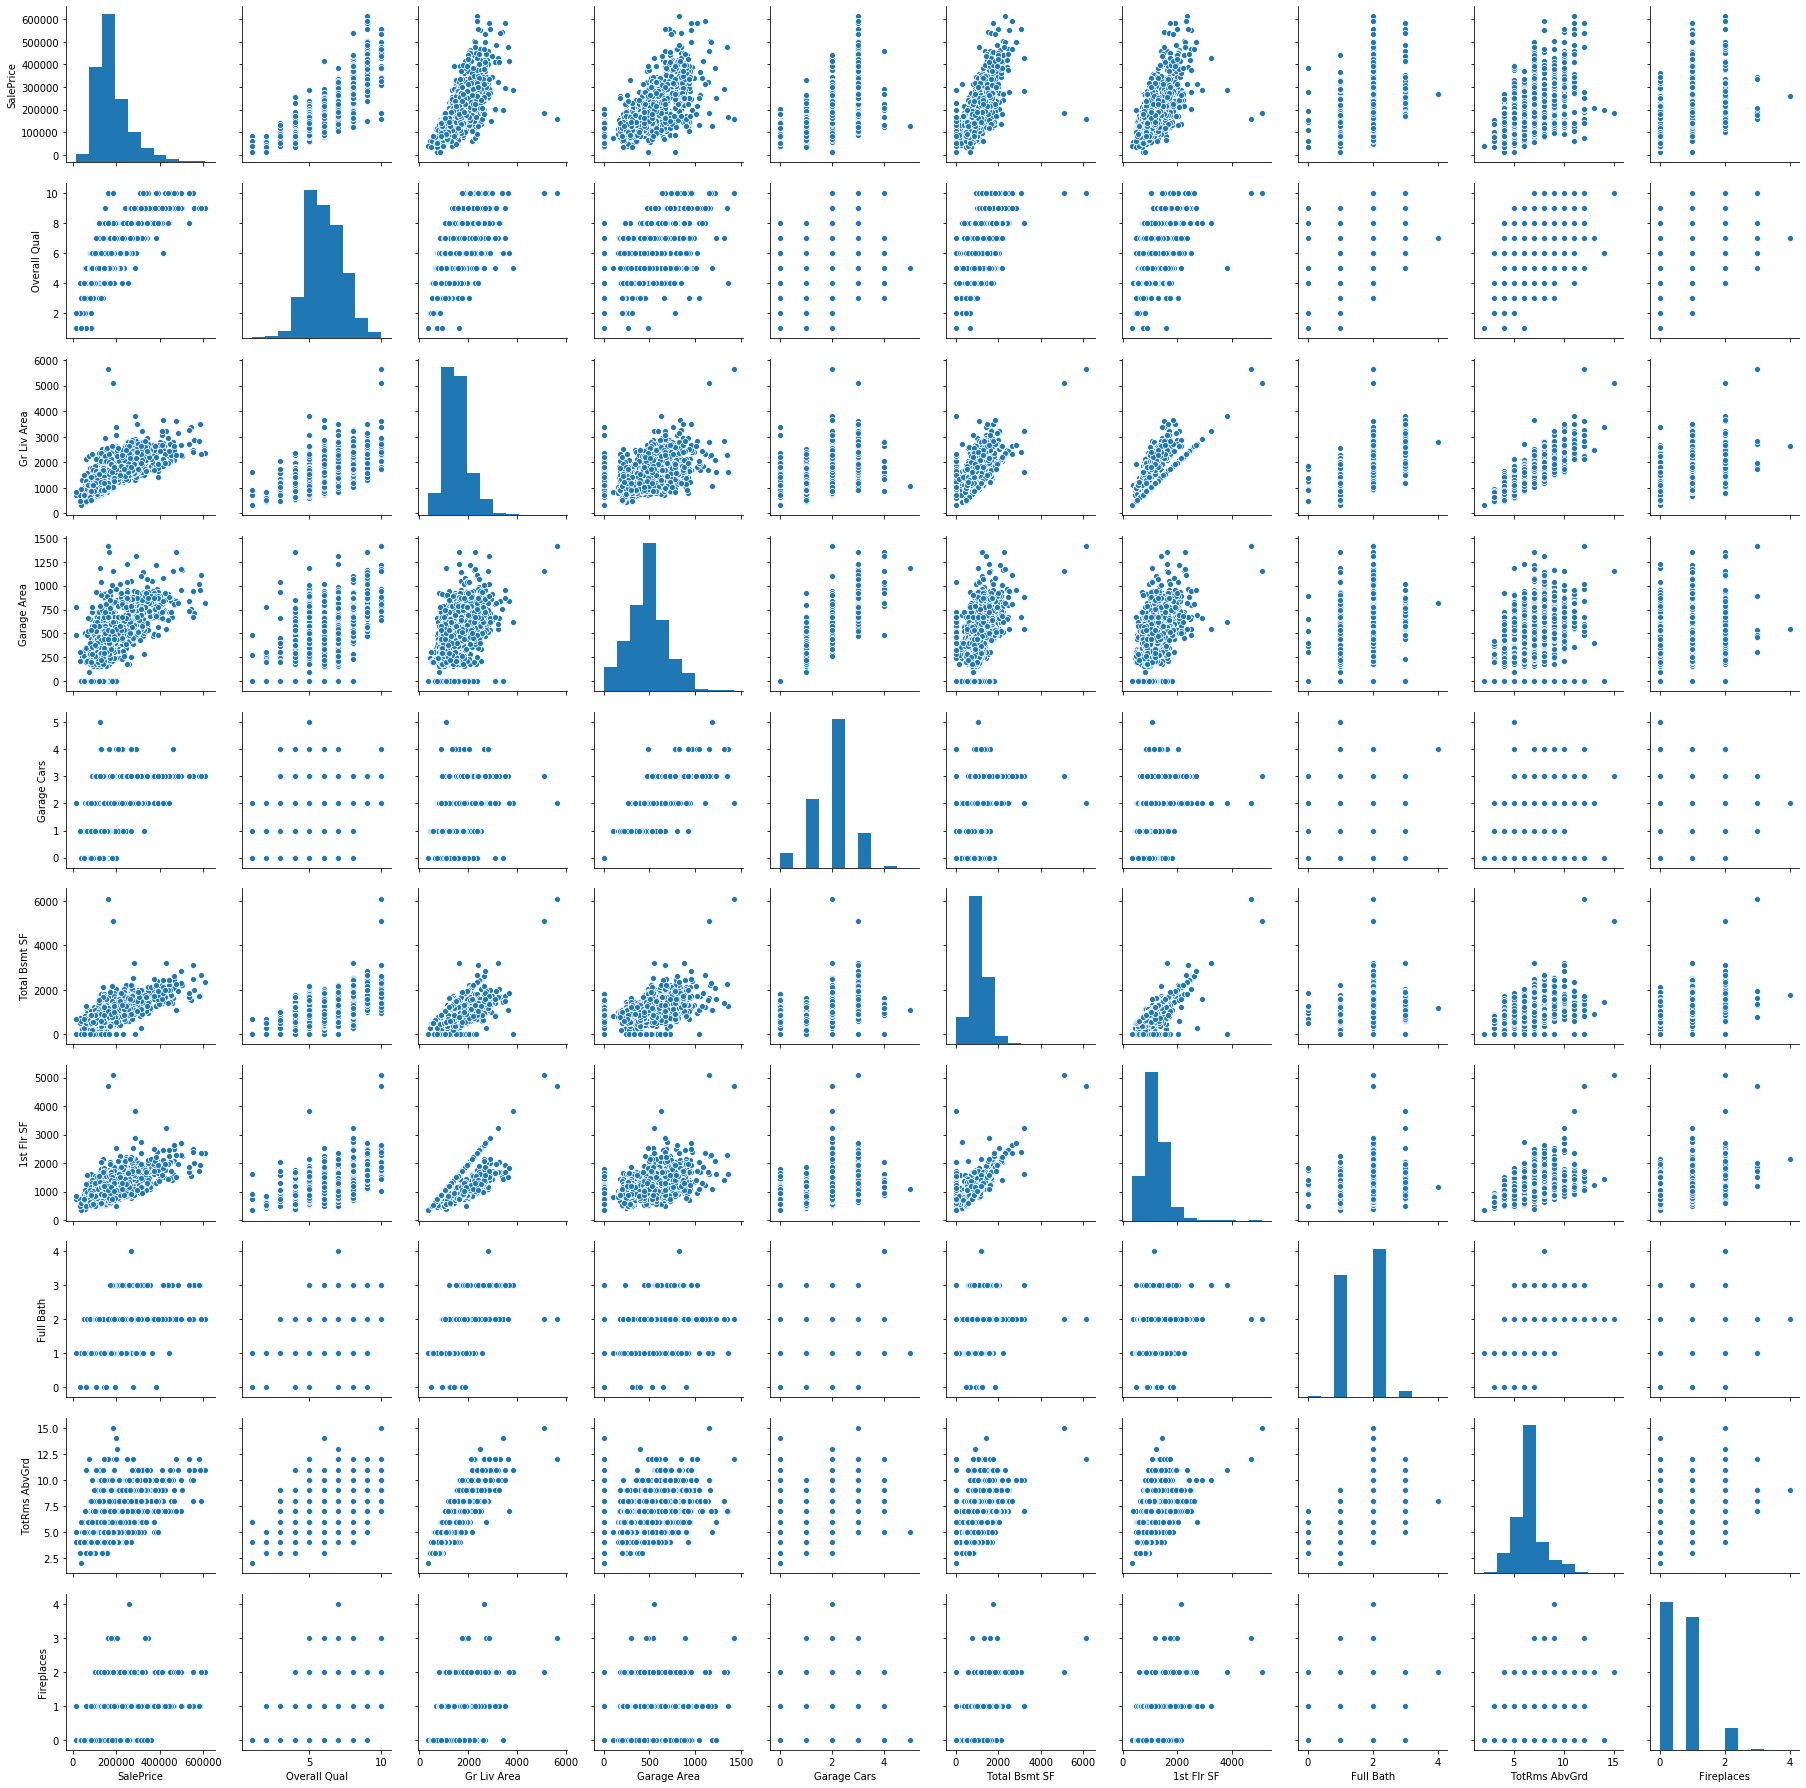

In [7]:
price_corr_df = df[['SalePrice','Overall Qual','Gr Liv Area', 'Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Full Bath','TotRms AbvGrd','Fireplaces']]
sns.pairplot(price_corr_df);

In [8]:
xvars = ['Overall Qual','Gr Liv Area', 'Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Full Bath','TotRms AbvGrd','Fireplaces']

In [9]:
X=df[xvars]
y=df['SalePrice']
%store y

Stored 'y' (Series)


In [10]:
X.shape, y.shape

((2050, 9), (2050,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [12]:
linmod = LinearRegression()
linmod.fit(X_train,y_train)
linmod.score(X_train,y_train),linmod.score(X_test,y_test)

(0.7672434716343294, 0.8252794783723252)

In [13]:
print(f'Intercept: {linmod.intercept_}')

Intercept: -98059.3520402046


In [14]:
%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)


## 03-Evaluate a Linear Regression Model. <a class="anchor" id="section3"></a>

In [15]:
#adapted from Mahdi's Quiz 2 review
list(zip(linmod.coef_, X.columns))

[(23677.904841121763, 'Overall Qual'),
 (31.076527309088814, 'Gr Liv Area'),
 (33.302633278887605, 'Garage Area'),
 (9636.909764309057, 'Garage Cars'),
 (19.77175134923078, 'Total Bsmt SF'),
 (10.355426562926763, '1st Flr SF'),
 (6030.507037148122, 'Full Bath'),
 (1103.2284187413343, 'TotRms AbvGrd'),
 (9881.537367509012, 'Fireplaces')]

In [16]:
#create a df for coefficients
columns = pd.Series(X.columns,name='col_name')
coefs = pd.Series(linmod.coef_,name='coef')
coef_df = pd.concat([columns,coefs],axis = 1)
coef_df

,col_name,coef
0,Overall Qual,23677.904841
1,Gr Liv Area,31.076527
2,Garage Area,33.302633
3,Garage Cars,9636.909764
4,Total Bsmt SF,19.771751
5,1st Flr SF,10.355427
6,Full Bath,6030.507037
7,TotRms AbvGrd,1103.228419
8,Fireplaces,9881.537368


In [17]:
coef_df = coef_df.sort_values("coef", ascending = False)
coef_df

,col_name,coef
0,Overall Qual,23677.904841
8,Fireplaces,9881.537368
3,Garage Cars,9636.909764
6,Full Bath,6030.507037
7,TotRms AbvGrd,1103.228419
2,Garage Area,33.302633
1,Gr Liv Area,31.076527
4,Total Bsmt SF,19.771751
5,1st Flr SF,10.355427


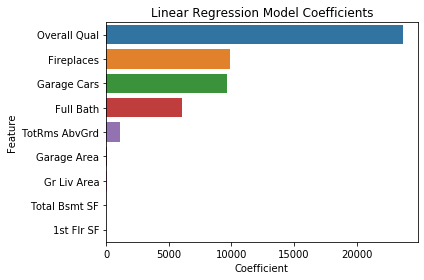

In [18]:
#Using coefficients are on the same scale as the Y because 'for 1 unit of Y...'
plt.title("Linear Regression Model Coefficients")
sns.barplot(coef_df["coef"], coef_df["col_name"]);
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('./PPP/LinRegMod_Coef.png',bbox_inches='tight');

In [19]:
y_preds = linmod.predict(X_test)

In [20]:
mean_squared_error(y_test,y_preds)**0.5

33043.574817735076

In [21]:
#on testing, my predictions are wrong by 33,043 between
min(y_test),max(y_test)

(12789, 555000)


__Interpretation:__ The test $R^2$ of 76.7% for train and 82.5% for test, suggest that our model can reasonably account for ~80% of the total variance of the target variable, price.

In a Linear Regression model, Overall Quality has the biggest influence over price.  For every 1 change in overall quality, there is an increase in price by \\$23,678 with all other things being equal.

## 04-Engineer Features. <a class="anchor" id="section4"></a>

### 4a. Make features. <a class="anchor" id="section4a"></a>

In [22]:
df.columns

Index(['Unnamed: 0', 'Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [23]:
#adapted from stack overflow 
objects = df.columns.to_series().groupby(df.dtypes).groups
objects

{dtype('int64'): Index(['Unnamed: 0', 'Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
        'Overall Cond', 'Central Air', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['Lot Frontage', 'Alley', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
        'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
        'Garage Area'],
       dtype='object'),
 dtype('O'): Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Year Built',
        'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',


In [24]:
df_dum = pd.get_dummies(df,columns = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
        'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
        'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
        'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional',
        'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
        'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
        'Misc Feature', 'Sale Type'],drop_first = True)

In [25]:
df_dum.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,...,Garage Yr Blt_1992-01-01 00:00:00,Garage Yr Blt_1993-01-01 00:00:00,Garage Yr Blt_1994-01-01 00:00:00,Garage Yr Blt_1995-01-01 00:00:00,Garage Yr Blt_1996-01-01 00:00:00,Garage Yr Blt_1997-01-01 00:00:00,Garage Yr Blt_1998-01-01 00:00:00,Garage Yr Blt_1999-01-01 00:00:00,Garage Yr Blt_2000-01-01 00:00:00,Garage Yr Blt_2001-01-01 00:00:00,Garage Yr Blt_2002-01-01 00:00:00,Garage Yr Blt_2003-01-01 00:00:00,Garage Yr Blt_2004-01-01 00:00:00,Garage Yr Blt_2005-01-01 00:00:00,Garage Yr Blt_2006-01-01 00:00:00,Garage Yr Blt_2007-01-01 00:00:00,Garage Yr Blt_2008-01-01 00:00:00,Garage Yr Blt_2009-01-01 00:00:00,Garage Yr Blt_2010-01-01 00:00:00,Garage Yr Blt_2207-01-01 00:00:00,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,109,533352170,60,0.0,13517,6,8,1976-01-01,2005-01-01,533.0,0.0,192.0,725.0,1,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,544,531379050,60,43.0,11492,7,5,1996-01-01,1997-01-01,637.0,0.0,276.0,913.0,1,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,153,535304180,20,68.0,7922,5,7,1953-01-01,2007-01-01,731.0,0.0,326.0,1057.0,1,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,318,916386060,60,73.0,9802,5,5,2006-01-01,2007-01-01,0.0,0.0,384.0,384.0,1,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,255,906425045,50,82.0,14235,6,8,1900-01-01,1993-01-01,0.0,0.0,676.0,676.0,1,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
df_dum.drop(df_dum.iloc[:, 3:37], inplace = True, axis = 1) 
df_dum.head()

,Unnamed: 0,Id,PID,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,Garage Yr Blt_1992-01-01 00:00:00,Garage Yr Blt_1993-01-01 00:00:00,Garage Yr Blt_1994-01-01 00:00:00,Garage Yr Blt_1995-01-01 00:00:00,Garage Yr Blt_1996-01-01 00:00:00,Garage Yr Blt_1997-01-01 00:00:00,Garage Yr Blt_1998-01-01 00:00:00,Garage Yr Blt_1999-01-01 00:00:00,Garage Yr Blt_2000-01-01 00:00:00,Garage Yr Blt_2001-01-01 00:00:00,Garage Yr Blt_2002-01-01 00:00:00,Garage Yr Blt_2003-01-01 00:00:00,Garage Yr Blt_2004-01-01 00:00:00,Garage Yr Blt_2005-01-01 00:00:00,Garage Yr Blt_2006-01-01 00:00:00,Garage Yr Blt_2007-01-01 00:00:00,Garage Yr Blt_2008-01-01 00:00:00,Garage Yr Blt_2009-01-01 00:00:00,Garage Yr Blt_2010-01-01 00:00:00,Garage Yr Blt_2207-01-01 00:00:00,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,109,533352170,2010,130500,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,544,531379050,2009,220000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,153,535304180,2010,109000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,318,916386060,2010,174000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,255,906425045,2010,138500,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 4b. Find correlations <a class="anchor" id="section4b"></a>

In [27]:
#evaluate just the dummy columns as a corr against price
df_dum_corr_top=df_dum.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False).head(7)
df_dum_corr_top

,SalePrice
SalePrice,1.000000
Foundation_PConc,0.529002
BsmtFin Type 1_GLQ,0.463491
Neighborhood_NridgHt,0.448623
Exter Qual_Gd,0.446623
Fireplace Qu_Gd,0.384668
Bsmt Exposure_Gd,0.376993


In [28]:
df_dum_corr_bottom=df_dum.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=True).head(7)
df_dum_corr_bottom

,SalePrice
Exter Qual_TA,-0.600327
Kitchen Qual_TA,-0.541209
Bsmt Qual_TA,-0.457245
Garage Finish_Unf,-0.432468
Mas Vnr Type_None,-0.411098
Garage Type_Detchd,-0.370297
Foundation_CBlock,-0.355772


In [29]:
df_dum_corr_bottom.index[0:8]

Index(['Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA', 'Garage Finish_Unf',
       'Mas Vnr Type_None', 'Garage Type_Detchd', 'Foundation_CBlock'],
      dtype='object')

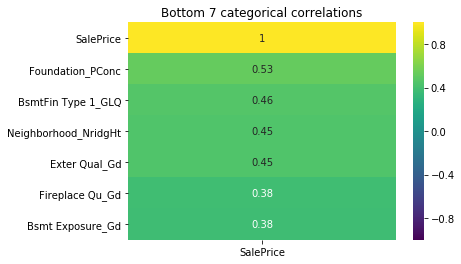

In [30]:
sns.heatmap(df_dum_corr_top,
           vmin=-1,
           cmap='viridis',
           annot=True)
plt.title('Bottom 7 categorical correlations')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('./PPP/corr_bottom.png',bbox_inches='tight');

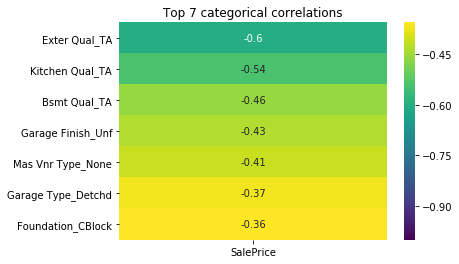

In [31]:
sns.heatmap(df_dum_corr_bottom,
           vmin=-1,
           cmap='viridis',
           annot=True)
plt.title('Top 7 categorical correlations')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('./PPP/corr_top.png',bbox_inches='tight');

In [32]:
df_dum_corr_bottom.index[0:8]

Index(['Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA', 'Garage Finish_Unf',
       'Mas Vnr Type_None', 'Garage Type_Detchd', 'Foundation_CBlock'],
      dtype='object')

In [33]:
df_dum_corr_top.index[0:8]

Index(['SalePrice', 'Foundation_PConc', 'BsmtFin Type 1_GLQ',
       'Neighborhood_NridgHt', 'Exter Qual_Gd', 'Fireplace Qu_Gd',
       'Bsmt Exposure_Gd'],
      dtype='object')

In [34]:
#adding dummies to the df for categorical columns that ended up as strong relationships
df = pd.get_dummies(df,columns = ['Exter Qual', 'Kitchen Qual', 'Fireplace Qu', 'Bsmt Qual','Garage Finish', 'Mas Vnr Type', 
                                  'Garage Type','Foundation', 'BsmtFin Type 1','Neighborhood', 'Exter Qual', 'Fireplace Qu',
                                  'Bsmt Exposure'],drop_first = True)
df.shape
df.head(3)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Cond,Bsmt Cond,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Functional,...,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 1_Unk,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_Unk
0,0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,289.0,TA,TA,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,132.0,TA,TA,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,...,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [35]:
df.columns.values

array(['Unnamed: 0', 'Id', 'PID', 'MS SubClass', 'MS Zoning',
       'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Cond', 'Bsmt Cond', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Sc

In [36]:
#add all baths
df['allba'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath'] + df['Full Bath'] + df['Half Bath']

In [37]:
#product of beds and baths
df['beba'] = df['allba'] * df['Bedroom AbvGr']

In [38]:
#product of TotRmsAbvGrd, baths and divide by sq feet
df['area_per_room']= (df['TotRms AbvGrd']*df['allba'])/(df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Gr Liv Area'])

In [39]:
# finished sqft of house
df['fin_sqft'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Gr Liv Area']

In [40]:
#finished sqft of house / total lot size
df['house_to_lot_ratio'] = df['fin_sqft']/ df['Lot Area']

In [41]:
#since we used all the bath columns to create allba, we will drop the bath columns to reduce collinearity
df.drop(columns = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],inplace=True)

In [42]:
#since we used 3 columns added to define the finished sqft of a house, we are dropping columns to reduce collinearity
df.drop(columns=['BsmtFin SF 1','BsmtFin SF 2','Gr Liv Area'],inplace=True)

In [43]:
#received error when building model: Input contains NaN, infinity or a value too large for dtype('float64') but couldn't find NaN
#adpated from StackExchange
df = df.reset_index()

In [44]:
#sqft upstairs vs downstairs
#df['sqft_1st_second'] = np.sqrt((df['1st Flr SF']/df['2nd Flr SF'])**2)
#Didn't use created an error the error in model.  Removed from xvar and the error went away.

### 4c. Rebuild a model with new features <a class="anchor" id="section4c"></a>

In [45]:
df_dum_corr_bottom.index[0:8]

Index(['Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA', 'Garage Finish_Unf',
       'Mas Vnr Type_None', 'Garage Type_Detchd', 'Foundation_CBlock'],
      dtype='object')

In [46]:
df_dum_corr_top.index[1:89]

Index(['Foundation_PConc', 'BsmtFin Type 1_GLQ', 'Neighborhood_NridgHt',
       'Exter Qual_Gd', 'Fireplace Qu_Gd', 'Bsmt Exposure_Gd'],
      dtype='object')

In [47]:
xvars = ['Overall Qual', 'Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Fireplaces',
         'Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA','Garage Finish_Unf', 'Mas Vnr Type_None', 'Garage Type_Detchd',
         'Foundation_PConc', 'BsmtFin Type 1_GLQ', 'Neighborhood_NridgHt','Exter Qual_Gd', 'Fireplace Qu_Gd', 'Bsmt Exposure_Gd','allba','beba','area_per_room',
          'fin_sqft','house_to_lot_ratio']

In [48]:
X=df[xvars]
%store X
X.head()

Stored 'X' (DataFrame)


,Overall Qual,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,TotRms AbvGrd,Fireplaces,Exter Qual_TA,Exter Qual_TA,Kitchen Qual_TA,Bsmt Qual_TA,Garage Finish_Unf,Mas Vnr Type_None,Garage Type_Detchd,Foundation_PConc,BsmtFin Type 1_GLQ,Neighborhood_NridgHt,Exter Qual_Gd,Exter Qual_Gd,Fireplace Qu_Gd,Fireplace Qu_Gd,Bsmt Exposure_Gd,allba,beba,area_per_room,fin_sqft,house_to_lot_ratio
0,6,475.0,2.0,725.0,725,6,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,3.0,9.0,0.008946,2012.0,0.148850
1,7,559.0,2.0,913.0,913,8,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,4.0,16.0,0.011598,2759.0,0.240080
2,5,246.0,1.0,1057.0,1057,5,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,2.0,6.0,0.005593,1788.0,0.225701
3,5,400.0,2.0,384.0,744,7,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,3.0,9.0,0.014543,1444.0,0.147317
4,6,484.0,2.0,676.0,831,6,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,2.0,6.0,0.008304,1445.0,0.101510


In [49]:
X.shape, y.shape

((2050, 27), (2050,))

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [51]:
feamod=LinearRegression()
feamod.fit(X_train,y_train)
%store feamod

Stored 'feamod' (LinearRegression)


In [52]:
feamod.score(X_train,y_train), feamod.score(X_test,y_test)

(0.8331625014380573, 0.8615624347309359)

__Interpretation:__ Our testing score at 87% is better than the 82% we saw without the engineered features.

In [53]:
print(f'Intercept: {feamod.intercept_}')

Intercept: 608.7609403658134


### 4d. Evaluating the new model.<a class="anchor" id="section4d"></a>

In [54]:
feamod_coef_list = list(zip(feamod.coef_, X.columns))
%store feamod_coef_list

Stored 'feamod_coef_list' (list)


In [55]:
list(zip(feamod.coef_, X.columns))

[(17493.02584789419, 'Overall Qual'),
 (23.198411355096866, 'Garage Area'),
 (7351.001082611708, 'Garage Cars'),
 (6.594980684662403, 'Total Bsmt SF'),
 (5.683111252904566, '1st Flr SF'),
 (15908.07838460131, 'TotRms AbvGrd'),
 (6179.9929192096315, 'Fireplaces'),
 (-21030.402809315514, 'Exter Qual_TA'),
 (-21030.402821230884, 'Exter Qual_TA'),
 (-7780.860389498032, 'Kitchen Qual_TA'),
 (-3393.104538218344, 'Bsmt Qual_TA'),
 (-2020.8012819221074, 'Garage Finish_Unf'),
 (418.73219337737464, 'Mas Vnr Type_None'),
 (-3729.7953652588776, 'Garage Type_Detchd'),
 (9819.034057569703, 'Foundation_PConc'),
 (-2106.8038091686035, 'BsmtFin Type 1_GLQ'),
 (30798.087848485276, 'Neighborhood_NridgHt'),
 (-17612.97729889197, 'Exter Qual_Gd'),
 (-17612.97729995793, 'Exter Qual_Gd'),
 (3218.1134385438477, 'Fireplace Qu_Gd'),
 (3218.113434536413, 'Fireplace Qu_Gd'),
 (21000.80974836217, 'Bsmt Exposure_Gd'),
 (38572.00756736072, 'allba'),
 (858.7378304181632, 'beba'),
 (-10695866.020910986, 'area_per_room

In [56]:
#create a df for coefficients
columns = pd.Series(X.columns,name='col_name')
coefs = pd.Series(feamod.coef_,name='coef')
coef_df = pd.concat([columns,coefs],axis = 1)
coef_df

,col_name,coef
0,Overall Qual,1.749303e+04
1,Garage Area,2.319841e+01
2,Garage Cars,7.351001e+03
3,Total Bsmt SF,6.594981e+00
4,1st Flr SF,5.683111e+00
5,TotRms AbvGrd,1.590808e+04
6,Fireplaces,6.179993e+03
7,Exter Qual_TA,-2.103040e+04
8,Exter Qual_TA,-2.103040e+04
9,Kitchen Qual_TA,-7.780860e+03


In [57]:
coef_df = coef_df.sort_values("coef", ascending = False)
coef_df

,col_name,coef
22,allba,3.857201e+04
16,Neighborhood_NridgHt,3.079809e+04
21,Bsmt Exposure_Gd,2.100081e+04
0,Overall Qual,1.749303e+04
5,TotRms AbvGrd,1.590808e+04
14,Foundation_PConc,9.819034e+03
2,Garage Cars,7.351001e+03
6,Fireplaces,6.179993e+03
19,Fireplace Qu_Gd,3.218113e+03
20,Fireplace Qu_Gd,3.218113e+03


In [58]:
%store coef_df

Stored 'coef_df' (DataFrame)


In [59]:
y_preds=feamod.predict(X_test)

In [60]:
mean_squared_error(y_test,y_preds)**0.5

29413.18420842595

In [61]:
#on testing, my predictions are wrong by 28,914 between:
min(y_test),max(y_test)

(12789, 555000)

Interpretation: The test $R^2$ that our model can reasonably account for ~87% of the total variance of the target variable, Sales Price.

Bias VS Variance: The model has moderate bias with low variance since the test score does better than the train score, and is barely underfit.  This model could benefit from more granular columns. 

Our MSE is off by \\$28,914 from the actual and that isn't too bad when compared to the scale of y.

## 05-Submission to upload. <a class="anchor" id="section5"></a>

In [62]:
df_test = pd.read_csv('./datasets/test.csv')
df_test.shape

(878, 80)

In [63]:
df_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [64]:
#adding dummies to the df for categorical columns that ended up as strong relationships
df_test = pd.get_dummies(df_test,columns = ['Exter Qual', 'Kitchen Qual', 'Fireplace Qu', 'Bsmt Qual','Garage Finish', 'Mas Vnr Type', 
                                  'Garage Type','Foundation', 'BsmtFin Type 1','Neighborhood', 'Exter Qual', 'Fireplace Qu',
                                  'Bsmt Exposure'],drop_first = True)
df_test.shape
df_test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Cond,Bsmt Cond,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Functional,Fireplaces,...,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,0.0,Fa,TA,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,9,Typ,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,10,Typ,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,7,Typ,1,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [65]:
#add all baths
df_test['allba'] = df_test['Bsmt Full Bath'] + df_test['Bsmt Half Bath'] + df_test['Full Bath'] + df_test['Half Bath']

In [66]:
#product of beds and baths
df_test['beba'] = df_test['allba'] * df_test['Bedroom AbvGr']

In [67]:
#product of TotRmsAbvGrd, baths and divide by sq feet  
df_test['area_per_room']= (df_test['TotRms AbvGrd']*df['allba'])/(df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2'] + df_test['Gr Liv Area'])

In [68]:
# finished sqft of house
df_test['fin_sqft'] = df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2'] + df_test['Gr Liv Area']

In [69]:
#finished sqft of house / total lot size
df_test['house_to_lot_ratio'] = df_test['fin_sqft']/ df_test['Lot Area']

In [70]:
#since we used 3 columns added to define the finished sqft of a house, we are dropping columns to reduce collinearity
df_test.drop(columns=['BsmtFin SF 1','BsmtFin SF 2','Gr Liv Area'],inplace=True)

In [71]:
#since we used all the bath columns to create allba, we will drop the bath columns to reduce collinearity
df_test.drop(columns = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],inplace=True)

In [79]:
xvars = ['Overall Qual', 'Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Fireplaces',
         'Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA','Garage Finish_Unf', 'Mas Vnr Type_None', 'Garage Type_Detchd',
         'Foundation_PConc', 'BsmtFin Type 1_GLQ', 'Neighborhood_NridgHt','Exter Qual_Gd', 'Fireplace Qu_Gd', 'Bsmt Exposure_Gd','allba','beba','area_per_room',
          'fin_sqft','house_to_lot_ratio']
%store xvars

Stored 'xvars' (list)


In [73]:
df_test.shape

(878, 138)

In [74]:
df_copy = df_test
df_test = df_test[xvars]
df_test.shape

(878, 27)

In [75]:
kaggle_preds=feamod.predict(df_test)
kaggle_preds[:10]

array([119197.48808684,  73690.79979244, 299559.13824907,   4841.05321976,
       225798.54063837,  26590.32537737, -14828.22067399, 123528.05044679,
       234669.91233964, 151008.84269511])

In [76]:
#create a dictionary from preds
submission = pd.DataFrame({
    "Id":df_copy['Id'],
    'SalePrice':kaggle_preds
    
})

In [77]:
submission.to_csv('submissions/submission_MLR.csv',index=False)

In [78]:
df = df[xvars]
%store

Stored variables and their in-db values:
X                            ->       Overall Qual  Garage Area  Garage Cars  Tota
X_test                       ->       Overall Qual  Gr Liv Area  Garage Area  Gara
X_train                      ->       Overall Qual  Gr Liv Area  Garage Area  Gara
coef_df                      ->                 col_name          coef
22         
df                           ->       index  Unnamed: 0    Id        PID  MS SubCl
feamod                       -> LinearRegression()
feamod_coef_list             -> [(17493.02584789419, 'Overall Qual'), (23.19841135
lasso_cv                     -> LassoCV(alphas=array([670.        , 671.31313131, 
lasso_cv_mse                 -> 28756.326988372348
y                            -> 0       130500
1       220000
2       109000
3    
y_test                       -> 1808    120000
694     302000
906      97000
544  
y_train                      -> 415     219000
273     129000
1146    180400
250  
z_test                     